# Introduction to Machine Learning (CSCI-UA.473)

## Lab 1: Introduction
### Date: September 16th, 2021

# Importing packages

We will first import some packages. An error importing one of these means you do not have it downloaded or it is not downloaded in the correct place. To install a package you can run:

* If you are using pip3: ```pip3 install your_package_name```

* If you are using conda: ```conda install your_package_name```

In [4]:
# Numerical/scientific computing packages.
import numpy as np
import scipy

# Machine learning package.
import sklearn

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sets the matplotlib backend for the notebook.
# sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is 
# displayed inline within the Jupyter notebook, 
# directly below the code cell that produced it
%matplotlib inline 

print('Finished successfully loading packages')


Finished successfully loading packages


# Checking the version of the packages

Sometimes we will need specific versions of a package so that all of our code is compatible. You can check which version you have installed below, but usually the latest version will be fine.

In [3]:
! conda install numpy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [5]:
np.__version__

'1.23.1'

In [6]:
scipy.__version__

'1.7.3'

In [7]:
sklearn.__version__

'1.0.2'

In [8]:
matplotlib.__version__

'3.5.2'

In [9]:
pickle.format_version

'4.0'

# Using Numpy

Numpy contains many useful functions for doing numerical operations on vectors and matrices.  The fundamental object here is the numpy array.

## Matrix and vector operations

In [10]:
# Vectors are represented by 1-D numpy arrays.

x = np.array([1, 0])
print('x = ', x)

x =  [1 0]


In [11]:
# Matrices are represented by 2-D numpy arrays.

A = np.asarray([[[1, 2], [3, 4], [5,6]], [[1, 2], [3, 4], [5,6]]])
print('A = ', A)

A =  [[[1 2]
  [3 4]
  [5 6]]

 [[1 2]
  [3 4]
  [5 6]]]


In [12]:
# We can get the shape of the array with...
print('A has shape ', A.shape)

# We can also get a certain row or column with...
print('First column of A = ', A[:,:,:])
# print('Second row of A = ', A[1,:])

# It is also sometimes useful to reshape our data (for example when using sklearn later)
# print('A as a vector: ', A.reshape((4,)))

A has shape  (2, 3, 2)
First column of A =  [[[1 2]
  [3 4]
  [5 6]]

 [[1 2]
  [3 4]
  [5 6]]]


In [13]:
# Multiply the matrix and the vector.
y1 = np.dot(A,x)
print('y1 = ', y1)

# Equivalently,
y2 = A @ x
print('y2 = ', y2)

y1 =  [[1 3 5]
 [1 3 5]]
y2 =  [[1 3 5]
 [1 3 5]]


In [14]:
# This is different from simply multiplying the two. 
# Note that since x has shape (2,) while A has shape (2,2), 
# x is copied twice to match A's shape before performing the operation
y3 = A * x
print('y3 = ', y3)

# This is called "broadcasting", and the smaller array is “broadcast” across 
# the larger array so that they have compatible shapes. 
# Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. 
a = np.array([1.0, 2.0, 3.0])
b = 2.0
print("a x b = ", a * b)

y3 =  [[[1 0]
  [3 0]
  [5 0]]

 [[1 0]
  [3 0]
  [5 0]]]
a x b =  [2. 4. 6.]


In [15]:
# Matrix multiplication AB.
B = np.asarray([[5, 6], [7, 8]])
C1 = np.matmul(A, B)
print('C1 = ', C1)

# Equivalently,
C2 = A @ B
print('C2 = ', C2)


C1 =  [[[19 22]
  [43 50]
  [67 78]]

 [[19 22]
  [43 50]
  [67 78]]]
C2 =  [[[19 22]
  [43 50]
  [67 78]]

 [[19 22]
  [43 50]
  [67 78]]]


In [16]:
# Initializing a random matrix of size 3 x 4
R = np.random.rand(3,4)
print('R = ', R)

R =  [[0.02248798 0.57057059 0.16499046 0.4913407 ]
 [0.39032123 0.45039721 0.61188274 0.46775193]
 [0.30586946 0.8756867  0.12411208 0.02657645]]



## Linear algebra in Numpy

Numpy also contains many useful linear algebra functions for solving systems of equations, computing inverses, norms, eigenvalues, etc.  Below is an example where we use it to solve a system of linear equations $Ax = b$ for the vector $x$.

$$
\begin{bmatrix}1 & 2 & 4 \\ -2 & 3 & 1 \\ -4 & 1 & 2\end{bmatrix}\begin{bmatrix}x_1 \\x_2 \\x_3 \end{bmatrix} = \begin{bmatrix}18 \\ 5 \\ 0\end{bmatrix}
$$

In [17]:
# Set up the equations.
A = np.array([[1, 2, 4], [-2, 3, 1], [-4, 1, 2]])
b = np.array([18, 5, 0])

# Solve the system.
x = np.linalg.solve(A, b)
print('x = ', x)

# Verify the solution by checking the residual is 0.
r = A @ x - b
print('r = ', r)

x =  [2. 2. 3.]
r =  [0. 0. 0.]


We can also invert the matrix $A$ and then multiply, but this is usually a bad idea for bigger systems.

In [18]:
A_inv = np.linalg.inv(A)

x = A_inv @ b
print('x = ', x)

# Compute the Euclidean norm of the residual.  It should be 0.
norm_r = np.linalg.norm(A @ x - b)
print('norm_r = ', norm_r)

x =  [2. 2. 3.]
norm_r =  0.0


# Using Matplotlib

## Plotting functions.

Matplotlib is convenient for plotting data and functions.  For example we can plot the function

$$
f(x) = \sin(x)
$$

by evaluating it on a grid of points.

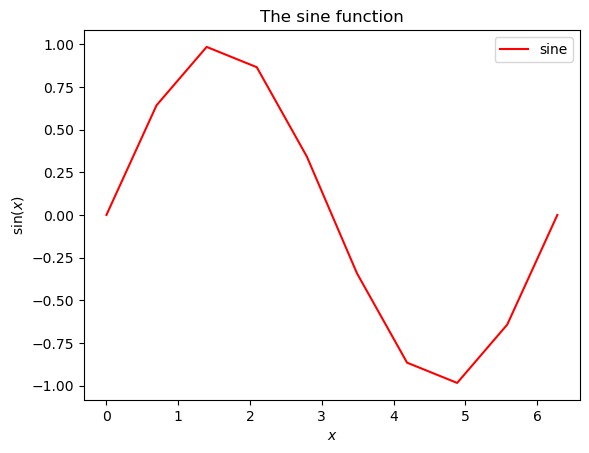

In [19]:
# Define the function.
f = lambda x: np.sin(x)

# Get the points we will plot.
x = np.linspace(0, 2*np.pi, 10) # 100 evenly spaced points between 0 and 2pi.

# Now plot the results.
plt.figure(1)
plt.plot(x, f(x), 'r-', label = r'sine')
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin(x)$')
plt.title(r'The sine function')
plt.legend();

## Surface plots.

We can also plot surfaces, such as 

$$
z(x,y) = x^2 + y^2
$$

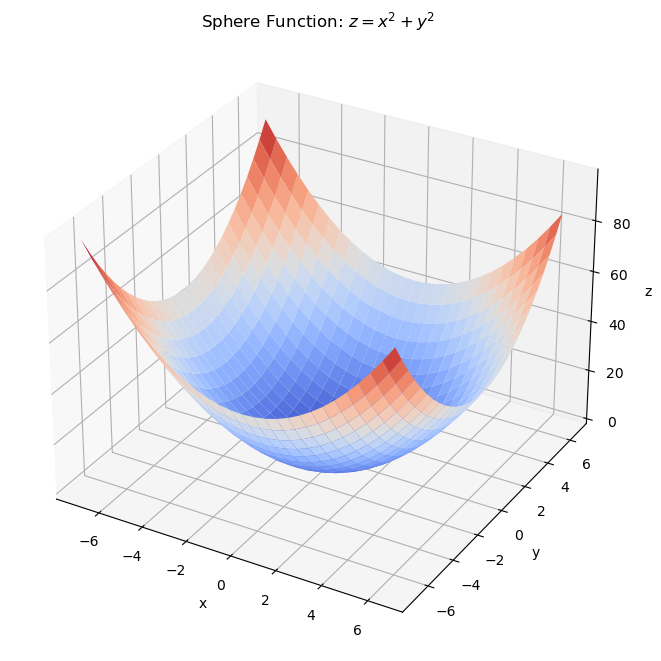

In [21]:
# create the grid data for the plot along with z values at each point
x, y = np.meshgrid(np.arange(-7, 7, 0.5), np.arange(-7, 7, 0.5))
z = x**2 + y**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title(r'Sphere Function: $z = x^2 + y^2$');

# Image as data
We will now load some image data as a numpy array and play around with it including displaying it and doing some exploratory data analysis. We'll show how to use standard Python libraries to visualize and distort images, switch between matrix and vector representations. We will use the CIFAR-10 object recognition data set as an example.

## Visualize random matrices as images

Before looking at real data, let us introduce the basic image data construct in Python. A color image is generally a 3-dimensional array with dimensions: NxMx3. The last dimension is the color channel, and the first two represent the X and Y grid of the image. The values are typically integer-valued pixel intensities for each color channel, with values between 0 and 255. The first thing we'll do is generate a random image and look at it.

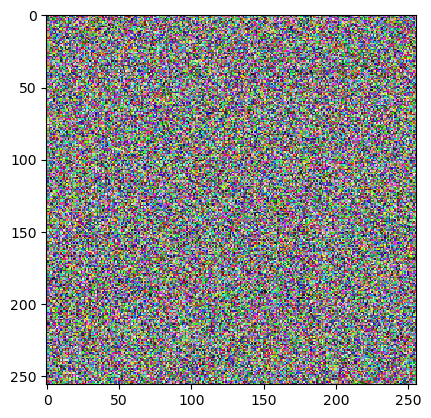

In [22]:
# Move this to after matplotlib part
# generate a 3-dimensional random array of integers in the range of [0,255]
x = 256
y = 256
d = 3

rand_img = np.random.randint(0, 256, size=(x, y, d), dtype='int')
img = plt.imshow(rand_img, interpolation='nearest')

## Visualize the CIFAR-10 dataset

We now load the CIFAR data, convert it into a matrix, and visualize the results. The data can be downloaded from: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [23]:
! tar -xvf cifar-10-python.tar.gz

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [24]:
#Student: change the data directory to where you have the data
data_dir = './cifar-10-batches-py/' # change the directory to where you will store the data
cifar_data_file = data_dir + 'data_batch_1'

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_data = unpickle(cifar_data_file)
images = cifar_data.get(b"data")
images = images.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

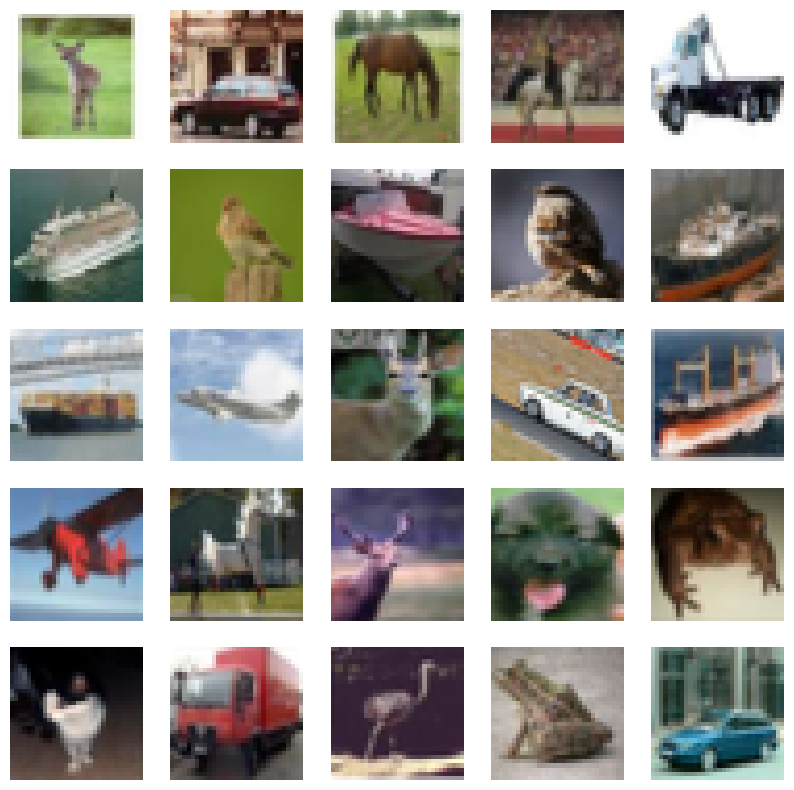

In [25]:
# loop over some random images and display them on the grid
fig, axes1 = plt.subplots(5, 5, figsize=(10, 10))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(images)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(images[i:i+1][0])

# Using Pickle

Pickle is a package for saving (serializing) Python objects and using them again later. This will be useful if we want to hold on to a model we have already trained since for many algorithms the training/learning phase is the most expensive.

Below is a short demonstration for a dummy object.

In [26]:
# Define some object.
class foo:  
    def __init__(self):
        # Give it a random number.
        self.a = np.random.rand()

# Create the object.
foo_1 = foo()
print('Random number = ', foo_1.a)

# Save the object.
# The "with" statement ensures that resources are released afterwards (here: files are closed)
fname = 'foo.p'
with open(fname, 'wb') as fp:
    pickle.dump(foo_1, fp)

# Now load the object.
with open(fname, 'rb') as fp:
    foo_2 = pickle.load(fp)

print('Should be the same random number = ', foo_2.a)

Random number =  0.9430143998371112
Should be the same random number =  0.9430143998371112


# Using Sci-kit Learn

Sci-kit learn is a Python package that contains many different machine learning algorithms.

## Linear regression 
A toy example where we fit a linear regression model to some synthetic data.

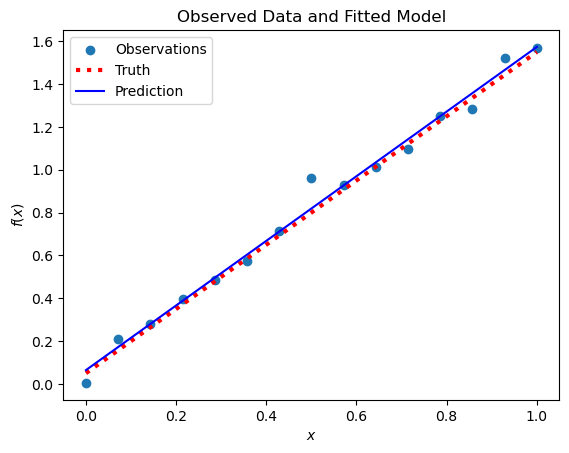

In [27]:
from sklearn.linear_model import LinearRegression

# True function we want to approximate.
f = lambda x: 1.5 * x + 0.05
noise_level = 0.05
# Generate some synthetic data.
N = 15 # Number of data points.
x = np.linspace(0, 1, N)
y = f(x) + noise_level * np.random.randn(N) # Observations incorporate some random noise.


# Now lets fit a linear regression model to our data.
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Note that .reshape(-1, 1): The -1 means "figure out what number is needed there".
# For example, in our case, the -1 becomes N because we have an array with N entries
# Note that .reshape(-1, 1) is different from .reshape(-1, ). The first is a 2-dim array, the second a 1-dim array

# Plot the fitted model with the truth and the observations.
plt.figure(4)
plt.scatter(x, y, label = 'Observations')
plt.plot(x, f(x), 'r:', label = 'Truth', lw = 3)
plt.plot(x, model.predict(x.reshape(-1, 1)), 'b-', label = 'Prediction')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'Observed Data and Fitted Model')
plt.legend();

## Linear regression with multiple features
An example where we fit a linear regression model to some real dataset having multiple input features.

In [28]:
from sklearn import datasets
import pandas as pd
# Load data:
data = np.genfromtxt('housingsata.csv', delimiter=',')
# data = datasets.fetch_california_housing().data
print(data.shape)

X, y = data[:,:4], data[:,4]

(2000, 5)


## But first... as we saw earlier, it is always a good idea to see what our data looks like. Particularly when dealing with real world datasets - Exploratory Data Analysis

(array([ 14.,  35., 148., 286., 399., 440., 387., 197.,  74.,  20.]),
 array([ 958. , 1254.2, 1550.4, 1846.6, 2142.8, 2439. , 2735.2, 3031.4,
        3327.6, 3623.8, 3920. ]),
 <BarContainer object of 10 artists>)

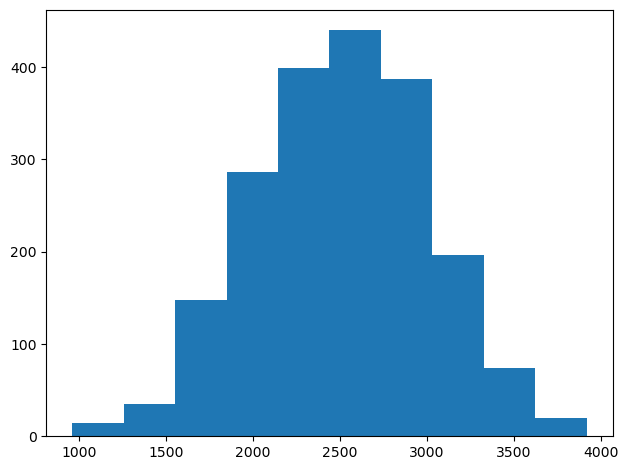

In [29]:
# Histograms
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(X[:,0], bins=None)

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>,
        <AxesSubplot:xlabel='4', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>,
        <AxesSubplot:xlabel='4', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>,
        <AxesSubplot:xlabel='3', ylabel='2'>,
        <AxesSubplot:xlabel='4', ylabel='2'>],
       [<AxesSubplot:xlabel='0', ylabel='3'>,
        <AxesSubplot:xlabel='1', ylabel='3'>,
        <AxesSubplot:xlabel='2', ylabel='3'>,
        <AxesSubplot:xlabel='3', ylabel='3'>,
        <AxesSubplot:xlabel='4', ylabel='3'>],
       [<AxesSubplot:xlabel='0', ylabel='4'>,
        <AxesSubplot:xlabel='1

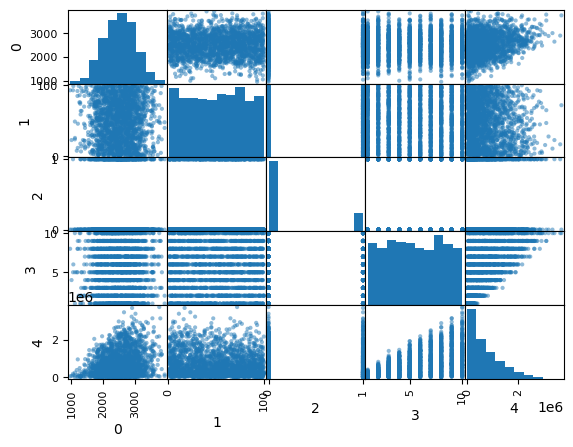

In [30]:
# Scatter plots
df = pd.DataFrame(data)
pd.plotting.scatter_matrix(df)


In [31]:
# # Model: Size (in sq ft)
print(X[:,:1].shape, y.shape)
X_sub= X[:3,:1]
y_sub = y[:3]/1e3
model = LinearRegression().fit(X_sub,y_sub)
# rSqr = model.score(X_sub,y_sub)
# print(rSqr)

# Visualize: actual vs. predicted income (from model)
yHat = model.predict(X_sub)
print(X_sub)
print(y_sub, yHat)
# plt.plot(yHat,y,'o',markersize=.75) 
# plt.xlabel('Prediction from model') 
# plt.ylabel('Actual income')  
# plt.title('R^2 = {:.3f}'.format(rSqr))

(2000, 1) (2000,)
[[2245.]
 [2116.]
 [3004.]]
[1435.1  1467.2    73.62] [1337.85217535 1550.32060688   87.74721777]


0.07812265188403111


Text(0.5, 1.0, 'R^2 = 0.078')

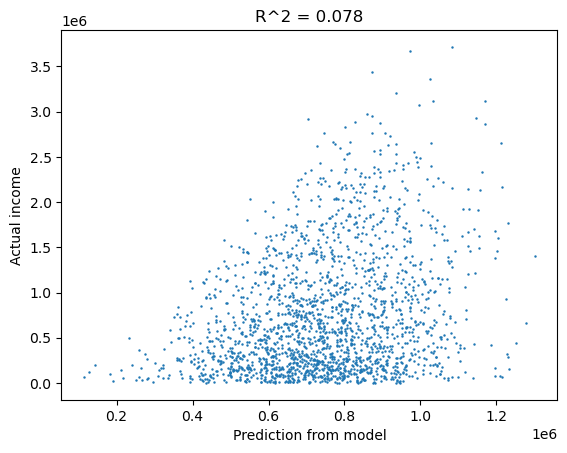

In [32]:
# Model: Size (in sq ft) and Age (in years)
model = LinearRegression().fit(X[:,:2],y)
rSqr = model.score(X[:,:2],y)
print(rSqr)

# Visualize: actual vs. predicted income (from model)
yHat = model.predict(X[:,:2])
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual income')  
plt.title('R^2 = {:.3f}'.format(rSqr))

0.07947207745440554


Text(0.5, 1.0, 'R^2 = 0.079')

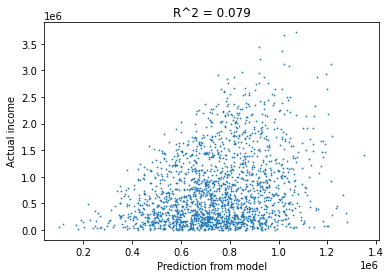

In [19]:
# Model: Size (in sq ft), Age (in years) and Has a pool? (Yes/No)

model = LinearRegression().fit(X[:,:3],y)
rSqr = model.score(X[:,:3],y)
print(rSqr)

# Visualize: actual vs. predicted income (from model)
yHat = model.predict(X[:,:3])
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual income')  
plt.title('R^2 = {:.3f}'.format(rSqr))

0.4220852272492308


Text(0.5, 1.0, 'R^2 = 0.422')

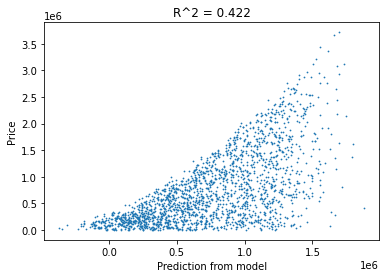

In [21]:
# Model: Using all features now

model = LinearRegression().fit(X,y)
rSqr = model.score(X,y)
print(rSqr)


b0, b1 = model.intercept_, model.coef_

# Visualize: actual vs. predicted income (from model)
yHat = model.predict(X)
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Price')  
plt.title('R^2 = {:.3f}'.format(rSqr))

## Now lets try understanding the least squares regression from a linear algebra perspective

(-0.035355339059327376,
 0.7424621202458749,
 -0.035355339059327376,
 0.7424621202458749)

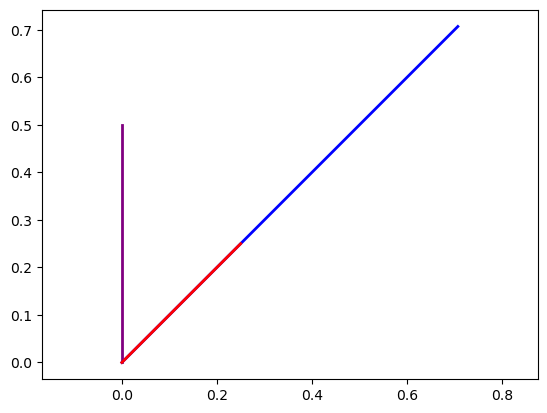

In [33]:
#Before we go into the details of this, recall the principles of vector projection from the lecture:
vec1 = np.array([0,0.5]) #Vector 1
vec2 = np.array([1,1]) #Vector 2
magVec1 = np.sqrt(vec1[0]**2 + vec1[1]**2) #Magnitude of vector 1
magVec2 = np.sqrt(vec2[0]**2 + vec2[1]**2) #Magnitude of vector 2 
dotProduct = np.dot(vec1,vec2) # Using a function to get the dot product 
angleBetween = np.degrees(np.arccos(dotProduct/(magVec1*magVec2))) #What is the angle between the vectors?
uVec = vec2/magVec2 # Creating a unit vector out of vec2 by dividing by magnitude

p = magVec1 * np.cos(np.deg2rad(angleBetween)) # The projection direction
projVec = p * uVec # That's the actual projected vector, yielded by p multiplied with the unit vector
plt.plot([0,vec1[0]],[0,vec1[1]],color='purple',linewidth=2) # Plot vec1 in purple
plt.plot([0,uVec[0]],[0,uVec[1]],color='blue',linewidth=2) # Plot uVec in blue
plt.plot([0,projVec[0]],[0,projVec[1]],color='red',linewidth=2) # Plot the projection of vec1 onto vec2 in red
plt.axis('equal') #Make sure aspect ratio is the same

/var/folders/7w/_s1d38tj1gg0r7nf9rbt0pzw0000gn/T/ipykernel_10092/1835328701.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # project into 3d space


Text(0.5, 0, 'House 3')

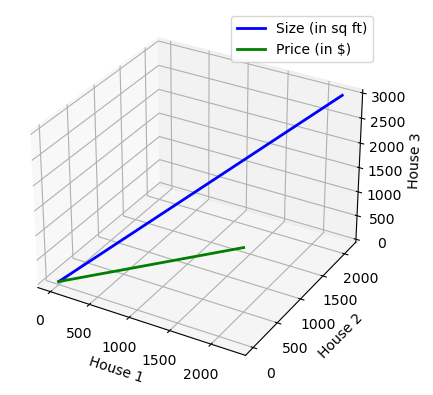

In [34]:
# Now lets use the geometric interpretation seen in the lectures to our housing dataset
# To make things easily visualised we will use only a subset of our dataset
X_sub = X[:3, 0]
y_sub = y[:3]/1e3

fig = plt.figure() # init figure
ax = fig.gca(projection='3d') # project into 3d space

ax.plot3D([0,X_sub[0]],[0,X_sub[1]],[0,X_sub[2]],color='blue',linewidth=2) 
ax.plot3D([0,y_sub[0]],[0,y_sub[1]],[0,y_sub[2]],color='green',linewidth=2) 
plt.legend(['Size (in sq ft)','Price (in \$)']) 
ax.set_xlabel('House 1') 
ax.set_ylabel('House 2') 
ax.set_zlabel('House 3') 

/var/folders/7w/_s1d38tj1gg0r7nf9rbt0pzw0000gn/T/ipykernel_10092/2165898732.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # project into 3d space


Text(0.5, 0, 'House 3')

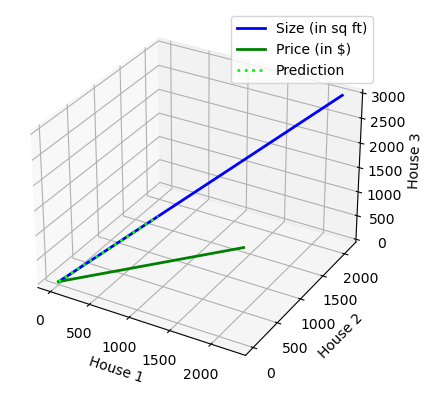

In [35]:
#%% Now, let's actually use the formula we derived
# We use the projection formula to find beta to minimize the distance
# between beta*input and output. Output = beta*input + error

beta = np.dot(y_sub,X_sub)/np.dot(X_sub,X_sub) # Find the beta
prediction = beta * X_sub # Make a prediction (simplest possible)

# Add this to the plot - the plot thickens:
fig = plt.figure() # init figure
ax = fig.gca(projection='3d') # project into 3d space
ax.plot3D([0,X_sub[0]],[0,X_sub[1]],[0,X_sub[2]],color='blue',linewidth=2) 
ax.plot3D([0,y_sub[0]],[0,y_sub[1]],[0,y_sub[2]],color='green',linewidth=2) 
ax.plot3D([0,prediction[0]],[0,prediction[1]],[0,prediction[2]],color='lime',linewidth=2,linestyle='dotted') 
plt.legend(['Size (in sq ft)','Price (in \$)','Prediction']) 
ax.set_xlabel('House 1') 
ax.set_ylabel('House 2') 
ax.set_zlabel('House 3') 

/var/folders/7w/_s1d38tj1gg0r7nf9rbt0pzw0000gn/T/ipykernel_10092/2155804043.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # project into 3d space


Text(0.5, 0, 'Trial 3')

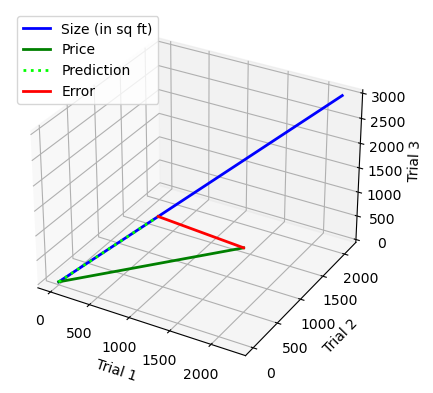

In [36]:
#%% Let's explicitly add the distance between the two (prediction and outcome)

fig = plt.figure() # init figure
ax = fig.gca(projection='3d') # project into 3d space
ax.plot3D([0, X_sub[0]],[0,X_sub[1]],[0,X_sub[2]],color='blue',linewidth=2) 
ax.plot3D([0,y_sub[0]],[0,y_sub[1]],[0,y_sub[2]],color='green',linewidth=2) 
ax.plot3D([0,prediction[0]],[0,prediction[1]],[0,prediction[2]],color='lime',linewidth=2,linestyle='dotted')
ax.plot3D([y_sub[0],prediction[0]],[y_sub[1],prediction[1]],[y_sub[2],prediction[2]],color='red',linewidth=2)  
plt.legend(['Size (in sq ft)','Price','Prediction','Error']) 
ax.set_xlabel('Trial 1') 
ax.set_ylabel('Trial 2') 
ax.set_zlabel('Trial 3') 

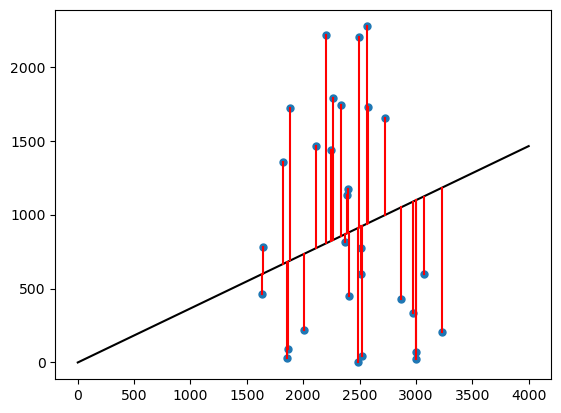

In [37]:
#%% Now that we convinced ourselves that this is in fact the correct beta (geometrically)
# we can go back and plot the solution
# We could open the old figure again, but let's start from scratch
# What if we had 30 houses?
maxArea = 4000
X_sub = X[:30, 0] 
y_sub = y[:30]/1e3
beta = np.dot(y_sub,X_sub)/np.dot(X_sub,X_sub) # Find the beta
prediction = beta * X_sub # Make a prediction (simplest possible)
regressionLineX = np.linspace(0,maxArea,10) # Gives us 10 equally spaced numbers between 0 and 4000. Intrapolation, x-base
regressionLineY = beta * regressionLineX # Find the ys of the regression line
plt.plot(X_sub,y_sub,'o',markersize=5) # Plot the data
plt.plot(regressionLineX,regressionLineY,color='black') # Plot regression line
plt.plot([X_sub,X_sub],[prediction,y_sub],color='red') # Residuals

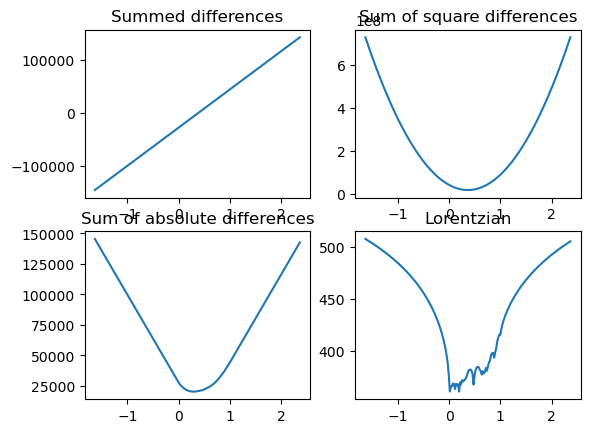

In [38]:
startExploration = beta - 2
endExploration = beta + 2
numBeta = 200
testBetas = np.linspace(startExploration,endExploration,numBeta)
distanceSum = np.empty([numBeta,4]) # Init container
distanceSum[:] = np.NaN # Convert to NaN

for ii in range(numBeta):
    prediction = testBetas[ii] * X_sub
    distanceSum[ii,0] = sum(prediction-y_sub) # Simple
    distanceSum[ii,1] = sum((prediction-y_sub)**2) # Sum of squares
    distanceSum[ii,2] = sum(abs(prediction-y_sub)) # Absolute value
    distanceSum[ii,3] = sum(np.log(1 + (prediction-y_sub)**2)) # Lorentzian

for ii in range(int(np.size(distanceSum)/len(distanceSum))):
    plt.subplot(2,2,ii+1)
    plt.plot(testBetas,distanceSum[:,ii])
    if ii == 0:
        plt.title('Summed differences')
    elif ii == 1:
        plt.title('Sum of square differences')
    elif ii == 2:
        plt.title('Sum of absolute differences')
    else:
        plt.title('Lorentzian')